In [1]:
import pandas as pd
import numpy as np 
import geopandas as gpd

import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("election_maharastra.csv")

In [3]:
df.head()

selection1_constituency  selection1_constNo selection1_leadingCandidate  \
0            ICHALKARANJI                 279         RAHUL PRAKASH AWADE   
1                IGATPURI                 127       KHOSKAR HIRAMAN BHIKA   
2                 INDAPUR                 200  DATTATRAYA VITHOBA BHARANE   
3                ISLAMPUR                 283        JAYANT RAJARAM PATIL   
4         JALGAON (JAMOD)                  27         KUTE SANJAY SHRIRAM   

                              selection1_selection2  \
0                            Bharatiya Janata Party   
1                        Nationalist Congress Party   
2                        Nationalist Congress Party   
3  Nationalist Congress Party – Sharadchandra Pawar   
4                            Bharatiya Janata Party   

             selection1_selection3  \
0            MADAN SITARAM KARANDE   
1           LUCKYBHAU BHIKA JADHAV   
2    HARSHVARDHAN SHAHAJIRAO PATIL   
3  NISHIKANT PRAKASH BHOSALE-PATIL   
4          DR SWATI SANDIP WAKEKAR   

                              selection1_selection4  selection1_selection5  \
0  Nationalist Congress Party – Sharadchandra Pawar                  56811   
1                          Indian National Congress                  86581   
2  Nationalist Congress Party – Sharadchandra Pawar                  19410   
3                        Nationalist Congress Party                  13027   
4                          Indian National Congress                  18771   

  selection1_selection6 selection1_selection7  
0                 20/20       Result Declared  
1                 22/22       Result Declared  
2                 26/26       Result Declared  
3                 21/21       Result Declared  
4                 24/24       Result Declared

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   selection1_constituency      288 non-null    object
 1   selection1_constNo           288 non-null    int64 
 2   selection1_leadingCandidate  288 non-null    object
 3   selection1_selection2        288 non-null    object
 4   selection1_selection3        288 non-null    object
 5   selection1_selection4        288 non-null    object
 6   selection1_selection5        288 non-null    int64 
 7   selection1_selection6        288 non-null    object
 8   selection1_selection7        288 non-null    object
dtypes: int64(2), object(7)
memory usage: 20.4+ KB


In [5]:
df.rename(columns={
    "selection1_constituency":"Constituency",
    "selection1_constNo": "ConstNo",
    "selection1_leadingCandidate": "LeadingCandidate",
    "selection1_selection2": "LeadingParty",
    "selection1_selection3": "TrailingCandidate",
    "selection1_selection4": "TrailingParty",
    "selection1_selection5": "Margin",
    "selection1_selection6": "Round",
    "selection1_selection7": "Status"
},inplace=True)
    
    

In [6]:
df.head()

Constituency  ConstNo            LeadingCandidate  \
0     ICHALKARANJI      279         RAHUL PRAKASH AWADE   
1         IGATPURI      127       KHOSKAR HIRAMAN BHIKA   
2          INDAPUR      200  DATTATRAYA VITHOBA BHARANE   
3         ISLAMPUR      283        JAYANT RAJARAM PATIL   
4  JALGAON (JAMOD)       27         KUTE SANJAY SHRIRAM   

                                       LeadingParty  \
0                            Bharatiya Janata Party   
1                        Nationalist Congress Party   
2                        Nationalist Congress Party   
3  Nationalist Congress Party – Sharadchandra Pawar   
4                            Bharatiya Janata Party   

                 TrailingCandidate  \
0            MADAN SITARAM KARANDE   
1           LUCKYBHAU BHIKA JADHAV   
2    HARSHVARDHAN SHAHAJIRAO PATIL   
3  NISHIKANT PRAKASH BHOSALE-PATIL   
4          DR SWATI SANDIP WAKEKAR   

                                      TrailingParty  Margin  Round  \
0  Nationalist Congress Party – Sharadchandra Pawar   56811  20/20   
1                          Indian National Congress   86581  22/22   
2  Nationalist Congress Party – Sharadchandra Pawar   19410  26/26   
3                        Nationalist Congress Party   13027  21/21   
4                          Indian National Congress   18771  24/24   

            Status  
0  Result Declared  
1  Result Declared  
2  Result Declared  
3  Result Declared  
4  Result Declared

In [7]:
df = df.sort_values(by="Constituency", ascending=True)

In [8]:
df.head()

Constituency  ConstNo                 LeadingCandidate  \
20         ACHALPUR       42          PRAVIN VASANTRAO TAYADE   
21            AHERI       69  ATRAM DHARAMRAOBABA BHAGWANTRAO   
22         AHMADPUR      236         BABASAHEB MOHANRAO PATIL   
23  AHMEDNAGAR CITY      225          SANGRAM ARUNKAKA JAGTAP   
24           AIROLI      150           GANESH RAMCHANDRA NAIK   

                  LeadingParty                        TrailingCandidate  \
20      Bharatiya Janata Party                           BACCHU B. KADU   
21  Nationalist Congress Party  RAJE AMBRISH RAO RAJE SATYAVANRAO ATRAM   
22  Nationalist Congress Party        JADHAV PATIL VINAYAKRAO KISHANRAO   
23  Nationalist Congress Party              ABHISHEK BALASAHEB KALAMKAR   
24      Bharatiya Janata Party                    CHOUGULE VIJAY LAXMAN   

                                       TrailingParty  Margin  Round  \
20                            Prahar Janshakti Party   12131  23/23   
21                                       Independent   16814  22/22   
22  Nationalist Congress Party – Sharadchandra Pawar   31669  27/27   
23  Nationalist Congress Party – Sharadchandra Pawar   39618  23/23   
24                                       Independent   91880  33/33   

             Status  
20  Result Declared  
21  Result Declared  
22  Result Declared  
23  Result Declared  
24  Result Declared

In [9]:
df

Constituency  ConstNo                           LeadingCandidate  \
20          ACHALPUR       42                    PRAVIN VASANTRAO TAYADE   
21             AHERI       69            ATRAM DHARAMRAOBABA BHAGWANTRAO   
22          AHMADPUR      236                   BABASAHEB MOHANRAO PATIL   
23   AHMEDNAGAR CITY      225                    SANGRAM ARUNKAKA JAGTAP   
24            AIROLI      150                     GANESH RAMCHANDRA NAIK   
..               ...      ...                                        ...   
283           WARORA       75                       KARAN SANJAY DEOTALE   
284           WASHIM       34                      SHYAM RAMCHARAN KHODE   
285            WORLI      182                    ADITYA UDDHAV THACKERAY   
286         YAVATMAL       78  ANIL ALIAS BALASAHEB SHANKARRAO MANGULKAR   
287            YEVLA      119                            CHHAGAN BHUJBAL   

                               LeadingParty  \
20                   Bharatiya Janata Party   
21               Nationalist Congress Party   
22               Nationalist Congress Party   
23               Nationalist Congress Party   
24                   Bharatiya Janata Party   
..                                      ...   
283                  Bharatiya Janata Party   
284                  Bharatiya Janata Party   
285  Shiv Sena (Uddhav Balasaheb Thackeray)   
286                Indian National Congress   
287              Nationalist Congress Party   

                           TrailingCandidate  \
20                            BACCHU B. KADU   
21   RAJE AMBRISH RAO RAJE SATYAVANRAO ATRAM   
22         JADHAV PATIL VINAYAKRAO KISHANRAO   
23               ABHISHEK BALASAHEB KALAMKAR   
24                     CHOUGULE VIJAY LAXMAN   
..                                       ...   
283                     MUKESH MANOJ JIWTODE   
284                 SIDDHARTH AKARAMJI DEOLE   
285                       MILIND MURLI DEORA   
286                   MADAN MADHUKAR YERAWAR   
287           ADV. MANIKRAO MADHAVRAO SHINDE   

                                        TrailingParty  Margin  Round  \
20                             Prahar Janshakti Party   12131  23/23   
21                                        Independent   16814  22/22   
22   Nationalist Congress Party – Sharadchandra Pawar   31669  27/27   
23   Nationalist Congress Party – Sharadchandra Pawar   39618  23/23   
24                                        Independent   91880  33/33   
..                                                ...     ...    ...   
283                                       Independent   15450  25/25   
284            Shiv Sena (Uddhav Balasaheb Thackeray)   19874  28/28   
285                                         Shiv Sena    8801  17/17   
286                            Bharatiya Janata Party   11381  31/31   
287  Nationalist Congress Party – Sharadchandra Pawar   26400  24/24   

              Status  
20   Result Declared  
21   Result Declared  
22   Result Declared  
23   Result Declared  
24   Result Declared  
..               ...  
283  Result Declared  
284  Result Declared  
285  Result Declared  
286  Result Declared  
287  Result Declared  

[288 rows x 9 columns]

In [10]:
df2= pd.read_csv("election_maharastra2019.csv")

In [11]:
df2.head()

selection1_name        selection1_selection2  \
0       Akkalkuwa                 K. C. Padavi   
1         Shahada                 Rajesh Padvi   
2       Nandurbar             Vijaykumar Gavit   
3         Navapur  Shirishkumar Surupsing Naik   
4           Sakri                Manjula Gavit   

                           selection1_selection2_url selection1_selection3  \
0  https://en.wikipedia.org/wiki/Kagda_Chandya_Padvi                   INC   
1         https://en.wikipedia.org/wiki/Rajesh_Padvi                   BJP   
2  https://en.wikipedia.org/wiki/Vijaykumar_Krish...                   BJP   
3  https://en.wikipedia.org/wiki/Shirishkumar_Sur...                   INC   
4        https://en.wikipedia.org/wiki/Manjula_Gavit                   Ind   

                           selection1_selection3_url  \
0  https://en.wikipedia.org/wiki/Indian_National_...   
1  https://en.wikipedia.org/wiki/Bharatiya_Janata...   
2  https://en.wikipedia.org/wiki/Bharatiya_Janata...   
3  https://en.wikipedia.org/wiki/Indian_National_...   
4  https://en.wikipedia.org/wiki/Independent_(pol...   

      selection1_selection4 selection1_selection5  \
0            Aamshya Padavi                    SS   
1  Padmakar Vijaysing Valvi                   INC   
2    Udesingh Kocharu Padvi                   INC   
3              Sharad Gavit                   Ind   
4         Mohan Suryawanshi                   BJP   

                           selection1_selection5_url selection1_selection6  
0            https://en.wikipedia.org/wiki/Shiv_Sena                 2,096  
1  https://en.wikipedia.org/wiki/Indian_National_...                 7,991  
2  https://en.wikipedia.org/wiki/Indian_National_...                70,396  
3  https://en.wikipedia.org/wiki/Independent_(pol...                11,335  
4  https://en.wikipedia.org/wiki/Bharatiya_Janata...                 7,265

In [12]:
df2 = df2.drop(["selection1_selection2_url", "selection1_selection3_url", "selection1_selection5_url"], axis=1)

In [13]:
df2.head()

selection1_name        selection1_selection2 selection1_selection3  \
0       Akkalkuwa                 K. C. Padavi                   INC   
1         Shahada                 Rajesh Padvi                   BJP   
2       Nandurbar             Vijaykumar Gavit                   BJP   
3         Navapur  Shirishkumar Surupsing Naik                   INC   
4           Sakri                Manjula Gavit                   Ind   

      selection1_selection4 selection1_selection5 selection1_selection6  
0            Aamshya Padavi                    SS                 2,096  
1  Padmakar Vijaysing Valvi                   INC                 7,991  
2    Udesingh Kocharu Padvi                   INC                70,396  
3              Sharad Gavit                   Ind                11,335  
4         Mohan Suryawanshi                   BJP                 7,265

In [14]:
df = df.drop(["ConstNo", "Round", "Status"], axis=1)

In [15]:
df.head()

Constituency                 LeadingCandidate  \
20         ACHALPUR          PRAVIN VASANTRAO TAYADE   
21            AHERI  ATRAM DHARAMRAOBABA BHAGWANTRAO   
22         AHMADPUR         BABASAHEB MOHANRAO PATIL   
23  AHMEDNAGAR CITY          SANGRAM ARUNKAKA JAGTAP   
24           AIROLI           GANESH RAMCHANDRA NAIK   

                  LeadingParty                        TrailingCandidate  \
20      Bharatiya Janata Party                           BACCHU B. KADU   
21  Nationalist Congress Party  RAJE AMBRISH RAO RAJE SATYAVANRAO ATRAM   
22  Nationalist Congress Party        JADHAV PATIL VINAYAKRAO KISHANRAO   
23  Nationalist Congress Party              ABHISHEK BALASAHEB KALAMKAR   
24      Bharatiya Janata Party                    CHOUGULE VIJAY LAXMAN   

                                       TrailingParty  Margin  
20                            Prahar Janshakti Party   12131  
21                                       Independent   16814  
22  Nationalist Congress Party – Sharadchandra Pawar   31669  
23  Nationalist Congress Party – Sharadchandra Pawar   39618  
24                                       Independent   91880

In [16]:
df2.rename(columns={
           "selection1_name": "Constituency",
           "selection1_selection2": "LeadingCandidate",
           "selection1_selection3": "LeadingParty",
           "selection1_selection4": "TrailingCandidate",
           "selection1_selection5": "TrailingParty",
           "selection1_selection6": "Margin",
},inplace=True)
       

In [17]:
df2.head()

Constituency             LeadingCandidate LeadingParty  \
0    Akkalkuwa                 K. C. Padavi          INC   
1      Shahada                 Rajesh Padvi          BJP   
2    Nandurbar             Vijaykumar Gavit          BJP   
3      Navapur  Shirishkumar Surupsing Naik          INC   
4        Sakri                Manjula Gavit          Ind   

          TrailingCandidate TrailingParty  Margin  
0            Aamshya Padavi            SS   2,096  
1  Padmakar Vijaysing Valvi           INC   7,991  
2    Udesingh Kocharu Padvi           INC  70,396  
3              Sharad Gavit           Ind  11,335  
4         Mohan Suryawanshi           BJP   7,265

In [18]:
maha_map = gpd.read_file("maharashtra_AC.json")

In [19]:
print(maha_map.head())

    stroke  stroke-opacity  fill-opacity ST_CODE      ST_NAME DT_CODE  \
0  #ff0000               1             0      27  MAHARASHTRA      01   
1  #ff0000               1             0      27  MAHARASHTRA      01   
2  #ff0000               1             0      27  MAHARASHTRA      07   
3  #ff0000               1             0      27  MAHARASHTRA      01   
4  #ff0000               1             0      27  MAHARASHTRA      02   

     DIST_NAME AC_NO         AC_NAME PC_NO         PC_NAME PC_ID  \
0  NANDURBAR *     1  Akkalkuwa (ST)     1  NANDURBAR (ST)  2701   
1  NANDURBAR *     2    Shahada (ST)     1  NANDURBAR (ST)  2701   
2     AMRAVATI    41    Melghat (ST)     7   AMRAVATI (SC)  2707   
3  NANDURBAR *     3  Nandurbar (ST)     1  NANDURBAR (ST)  2701   
4        DHULE     9    Shirpur (ST)     1  NANDURBAR (ST)  2701   

           Shape_Leng              Shape_Area       MaxSimpTol  \
0  317843.67283000000  2151934736.80000020000  300.00000000000   
1  286745.2226839999

<Figure size 1200x1000 with 0 Axes>

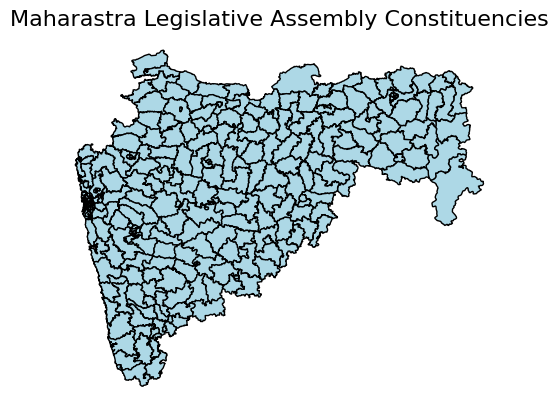

In [20]:
plt.figure(figsize=(12,10))
maha_map.plot(edgecolor='black',color='lightblue')
plt.title('Maharastra Legislative Assembly Constituencies', fontsize=16)
plt.axis('off')
plt.show()

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Constituency       288 non-null    object
 1   LeadingCandidate   288 non-null    object
 2   LeadingParty       286 non-null    object
 3   TrailingCandidate  288 non-null    object
 4   TrailingParty      288 non-null    object
 5   Margin             288 non-null    object
dtypes: object(6)
memory usage: 13.6+ KB


In [22]:
print(df2['LeadingParty'].unique())

['INC' 'BJP' 'Ind' 'AIMIM' 'SS' 'NCP' 'PJP' 'SWP' 'PWPI' 'RSP' 'CPM' 'BVA'
 'SP' 'MNS' nan]


In [23]:
print(df['LeadingParty'].unique())

['Bharatiya Janata Party' 'Nationalist Congress Party' 'Shiv Sena'
 'Indian National Congress' 'Rashtriya Yuva Swabhiman Party'
 'Shiv Sena (Uddhav Balasaheb Thackeray)'
 'Nationalist Congress Party – Sharadchandra Pawar' 'Samajwadi Party'
 'Independent' 'Communist Party of India (Marxist)'
 'Rashtriya Samaj Paksha' 'Jan Surajya Shakti'
 'All India Majlis-E-Ittehadul Muslimeen'
 'Peasants And Workers Party of India' 'Rajarshi Shahu Vikas Aghadi']


In [24]:
df['LeadingParty'].replace({'Bharatiya Janata Party': 'BJP'}, inplace=True)
df['LeadingParty'].replace({'Indian National Congress':'INC' }, inplace=True)
df['LeadingParty'].replace({'Nationalist Congress Party':'NCP' }, inplace=True)
df['LeadingParty'].replace({'Shiv Sena':'SS' }, inplace=True)
df['LeadingParty'].replace({'Rashtriya Yuva Swabhiman Party':'RYSP' }, inplace=True)
df['LeadingParty'].replace({'Shiv Sena (Uddhav Balasaheb Thackeray)': 'SSUT'}, inplace=True)
df['LeadingParty'].replace({'Nationalist Congress Party – Sharadchandra Pawar':'NCPSP' }, inplace=True)
df['LeadingParty'].replace({'Samajwadi Party':'SP' }, inplace=True)
df['LeadingParty'].replace({'Independent':'IND' }, inplace=True)
df['LeadingParty'].replace({'Communist Party of India (Marxist)':'CPM' }, inplace=True)
df['LeadingParty'].replace({'Rashtriya Samaj Paksha':'RSP' }, inplace=True)
df['LeadingParty'].replace({'Jan Surajya Shakti':'JSS' }, inplace=True)
df['LeadingParty'].replace({'All India Majlis-E-Ittehadul Muslimeen':'AIMIM' }, inplace=True)
df['LeadingParty'].replace({'Peasants And Workers Party of India':'PWPI' }, inplace=True)
df['LeadingParty'].replace({'Rajarshi Shahu Vikas Aghadi':'RSVA' }, inplace=True)

In [25]:
df['TrailingParty'].replace({'Bharatiya Janata Party': 'BJP'}, inplace=True)
df['TrailingParty'].replace({'Indian National Congress':'INC' }, inplace=True)
df['TrailingParty'].replace({'Nationalist Congress Party':'NCP' }, inplace=True)
df['TrailingParty'].replace({'Shiv Sena':'SS' }, inplace=True)
df['TrailingParty'].replace({'Rashtriya Yuva Swabhiman Party':'RYSP' }, inplace=True)
df['TrailingParty'].replace({'Shiv Sena (Uddhav Balasaheb Thackeray)': 'SSUT'}, inplace=True)
df['TrailingParty'].replace({'Nationalist Congress Party – Sharadchandra Pawar':'NCPSP' }, inplace=True)
df['TrailingParty'].replace({'Samajwadi Party':'SP' }, inplace=True)
df['TrailingParty'].replace({'Independent':'IND' }, inplace=True)
df['TrailingParty'].replace({'Communist Party of India (Marxist)':'CPM' }, inplace=True)
df['TrailingParty'].replace({'Rashtriya Samaj Paksha':'RSP' }, inplace=True)
df['TrailingParty'].replace({'Jan Surajya Shakti':'JSS' }, inplace=True)
df['TrailingParty'].replace({'All India Majlis-E-Ittehadul Muslimeen':'AIMIM' }, inplace=True)
df['TrailingParty'].replace({'Peasants And Workers Party of India':'PWPI' }, inplace=True)
df['TrailingParty'].replace({'Rajarshi Shahu Vikas Aghadi':'RSVA' }, inplace=True)
df['TrailingParty'].replace({'Prahar Janshakti Party':'PJP' }, inplace=True)
df['TrailingParty'].replace({'Vanchit Bahujan Aaghadi':'VBA' }, inplace=True)
df['TrailingParty'].replace({'Bahujan Vikas Aaghadi':'BVA' }, inplace=True)
df['TrailingParty'].replace({'Maharashtra Navnirman sena':'MNS' }, inplace=True)
df['TrailingParty'].replace({'Indian Secular Largest Assembly of Maharashtra':'ISLA' }, inplace=True)

In [26]:
df.head()

Constituency                 LeadingCandidate LeadingParty  \
20         ACHALPUR          PRAVIN VASANTRAO TAYADE          BJP   
21            AHERI  ATRAM DHARAMRAOBABA BHAGWANTRAO          NCP   
22         AHMADPUR         BABASAHEB MOHANRAO PATIL          NCP   
23  AHMEDNAGAR CITY          SANGRAM ARUNKAKA JAGTAP          NCP   
24           AIROLI           GANESH RAMCHANDRA NAIK          BJP   

                          TrailingCandidate TrailingParty  Margin  
20                           BACCHU B. KADU           PJP   12131  
21  RAJE AMBRISH RAO RAJE SATYAVANRAO ATRAM           IND   16814  
22        JADHAV PATIL VINAYAKRAO KISHANRAO         NCPSP   31669  
23              ABHISHEK BALASAHEB KALAMKAR         NCPSP   39618  
24                    CHOUGULE VIJAY LAXMAN           IND   91880

In [27]:
print(df['LeadingParty'].unique())

['BJP' 'NCP' 'SS' 'INC' 'RYSP' 'SSUT' 'NCPSP' 'SP' 'IND' 'CPM' 'RSP' 'JSS'
 'AIMIM' 'PWPI' 'RSVA']


In [28]:
print(df['TrailingParty'].unique())

['PJP' 'IND' 'NCPSP' 'INC' 'SSUT' 'BJP' 'PWPI' 'AIMIM' 'VBA' 'SS' 'NCP'
 'SP' 'BVA' 'RYSP' 'CPM' 'MNS' 'ISLA']


In [29]:
df['Year']= 2024
df2['Year']= 2019

In [30]:
combined_data = pd.concat([df,df2],ignore_index=True)

In [31]:
combined_data.head()

Constituency                 LeadingCandidate LeadingParty  \
0         ACHALPUR          PRAVIN VASANTRAO TAYADE          BJP   
1            AHERI  ATRAM DHARAMRAOBABA BHAGWANTRAO          NCP   
2         AHMADPUR         BABASAHEB MOHANRAO PATIL          NCP   
3  AHMEDNAGAR CITY          SANGRAM ARUNKAKA JAGTAP          NCP   
4           AIROLI           GANESH RAMCHANDRA NAIK          BJP   

                         TrailingCandidate TrailingParty Margin  Year  
0                           BACCHU B. KADU           PJP  12131  2024  
1  RAJE AMBRISH RAO RAJE SATYAVANRAO ATRAM           IND  16814  2024  
2        JADHAV PATIL VINAYAKRAO KISHANRAO         NCPSP  31669  2024  
3              ABHISHEK BALASAHEB KALAMKAR         NCPSP  39618  2024  
4                    CHOUGULE VIJAY LAXMAN           IND  91880  2024

In [32]:
print(maha_map.columns)

Index(['stroke', 'stroke-opacity', 'fill-opacity', 'ST_CODE', 'ST_NAME',
       'DT_CODE', 'DIST_NAME', 'AC_NO', 'AC_NAME', 'PC_NO', 'PC_NAME', 'PC_ID',
       'Shape_Leng', 'Shape_Area', 'MaxSimpTol', 'MinSimpTol', 'visibility',
       'geometry'],
      dtype='object')


In [33]:
equal = set(maha_map['AC_NAME']) == set(combined_data['Constituency'])

In [34]:
print(equal)

False


In [35]:
sorted_column = maha_map['AC_NAME'].sort_values()
print(sorted_column)

17       Achalpur
112    Aheri (ST)
231      Ahmadpur
199    Ahmednagar
163        Airoli
          ...    
205          None
206          None
210          None
220          None
223          None
Name: AC_NAME, Length: 302, dtype: object


In [36]:
maha_map['AC_NAME'] = maha_map['AC_NAME'].str.replace(r'\s*\(SC\)\s*', '', regex=True).str.strip()
maha_map['AC_NAME'] = maha_map['AC_NAME'].str.replace(r'\s*\(ST\)\s*', '', regex=True).str.strip()

In [37]:
sorted_column = maha_map['AC_NAME'].sort_values()
print(sorted_column)

17       Achalpur
112         Aheri
231      Ahmadpur
199    Ahmednagar
163        Airoli
          ...    
205          None
206          None
210          None
220          None
223          None
Name: AC_NAME, Length: 302, dtype: object


In [38]:
print(maha_map['AC_NAME'].info)

<bound method Series.info of 0        Akkalkuwa
1          Shahada
2          Melghat
3        Nandurbar
4          Shirpur
          ...     
297    Radhanagari
298          Kagal
299          Kudal
300       Chandgad
301     Sawantwadi
Name: AC_NAME, Length: 302, dtype: object>


In [39]:
maha_map = maha_map.dropna(subset = ['AC_NAME'])

In [40]:
print(maha_map['AC_NAME'].isna().sum()) 

0


In [41]:
maha_map['AC_NAME'] = maha_map['AC_NAME'].replace(['None', 'NA', '', 'missing', ' ', np.nan], np.nan)

C:\Users\arvin\anaconda3\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [42]:
maha_map = maha_map.dropna(subset=['AC_NAME'])

In [43]:
sorted_column = maha_map['AC_NAME'].sort_values()
print(sorted_column)

17       Achalpur
112         Aheri
231      Ahmadpur
199    Ahmednagar
163        Airoli
          ...    
81         Warora
80         Washim
204         Worli
77       Yavatmal
88          Yevla
Name: AC_NAME, Length: 288, dtype: object


In [44]:
combined_data['Constituency']= combined_data['Constituency'].str.strip().str.upper()
maha_map['AC_NAME']= maha_map['AC_NAME'].str.strip().str.upper()

In [45]:
merged_data = maha_map.merge(
    combined_data,
    left_on = 'AC_NAME',
    right_on = 'Constituency'
)

In [46]:
print(merged_data.head())

    stroke  stroke-opacity  fill-opacity ST_CODE      ST_NAME DT_CODE  \
0  #ff0000               1             0      27  MAHARASHTRA      01   
1  #ff0000               1             0      27  MAHARASHTRA      01   
2  #ff0000               1             0      27  MAHARASHTRA      01   
3  #ff0000               1             0      27  MAHARASHTRA      01   
4  #ff0000               1             0      27  MAHARASHTRA      07   

     DIST_NAME AC_NO    AC_NAME PC_NO  ...       MinSimpTol visibility  \
0  NANDURBAR *     1  AKKALKUWA     1  ...    0.01831054688          0   
1  NANDURBAR *     1  AKKALKUWA     1  ...    0.01831054688          0   
2  NANDURBAR *     2    SHAHADA     1  ...  300.00000000000          0   
3  NANDURBAR *     2    SHAHADA     1  ...  300.00000000000          0   
4     AMRAVATI    41    MELGHAT     7  ...  300.00000000000          0   

                                            geometry Constituency  \
0  POLYGON Z ((74.4388 22.0253 0, 74.44376 22.0

In [47]:
print(type(df2))
print(type(df))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [48]:
df2 = maha_map.merge(combined_data[combined_data['Year'] == 2019], 
                     left_on='AC_NAME', 
                     right_on='Constituency')
df = maha_map.merge(combined_data[combined_data['Year'] == 2024], 
                    left_on='AC_NAME', 
                    right_on='Constituency')

In [49]:
print(type(df2))
print(type(df))


<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


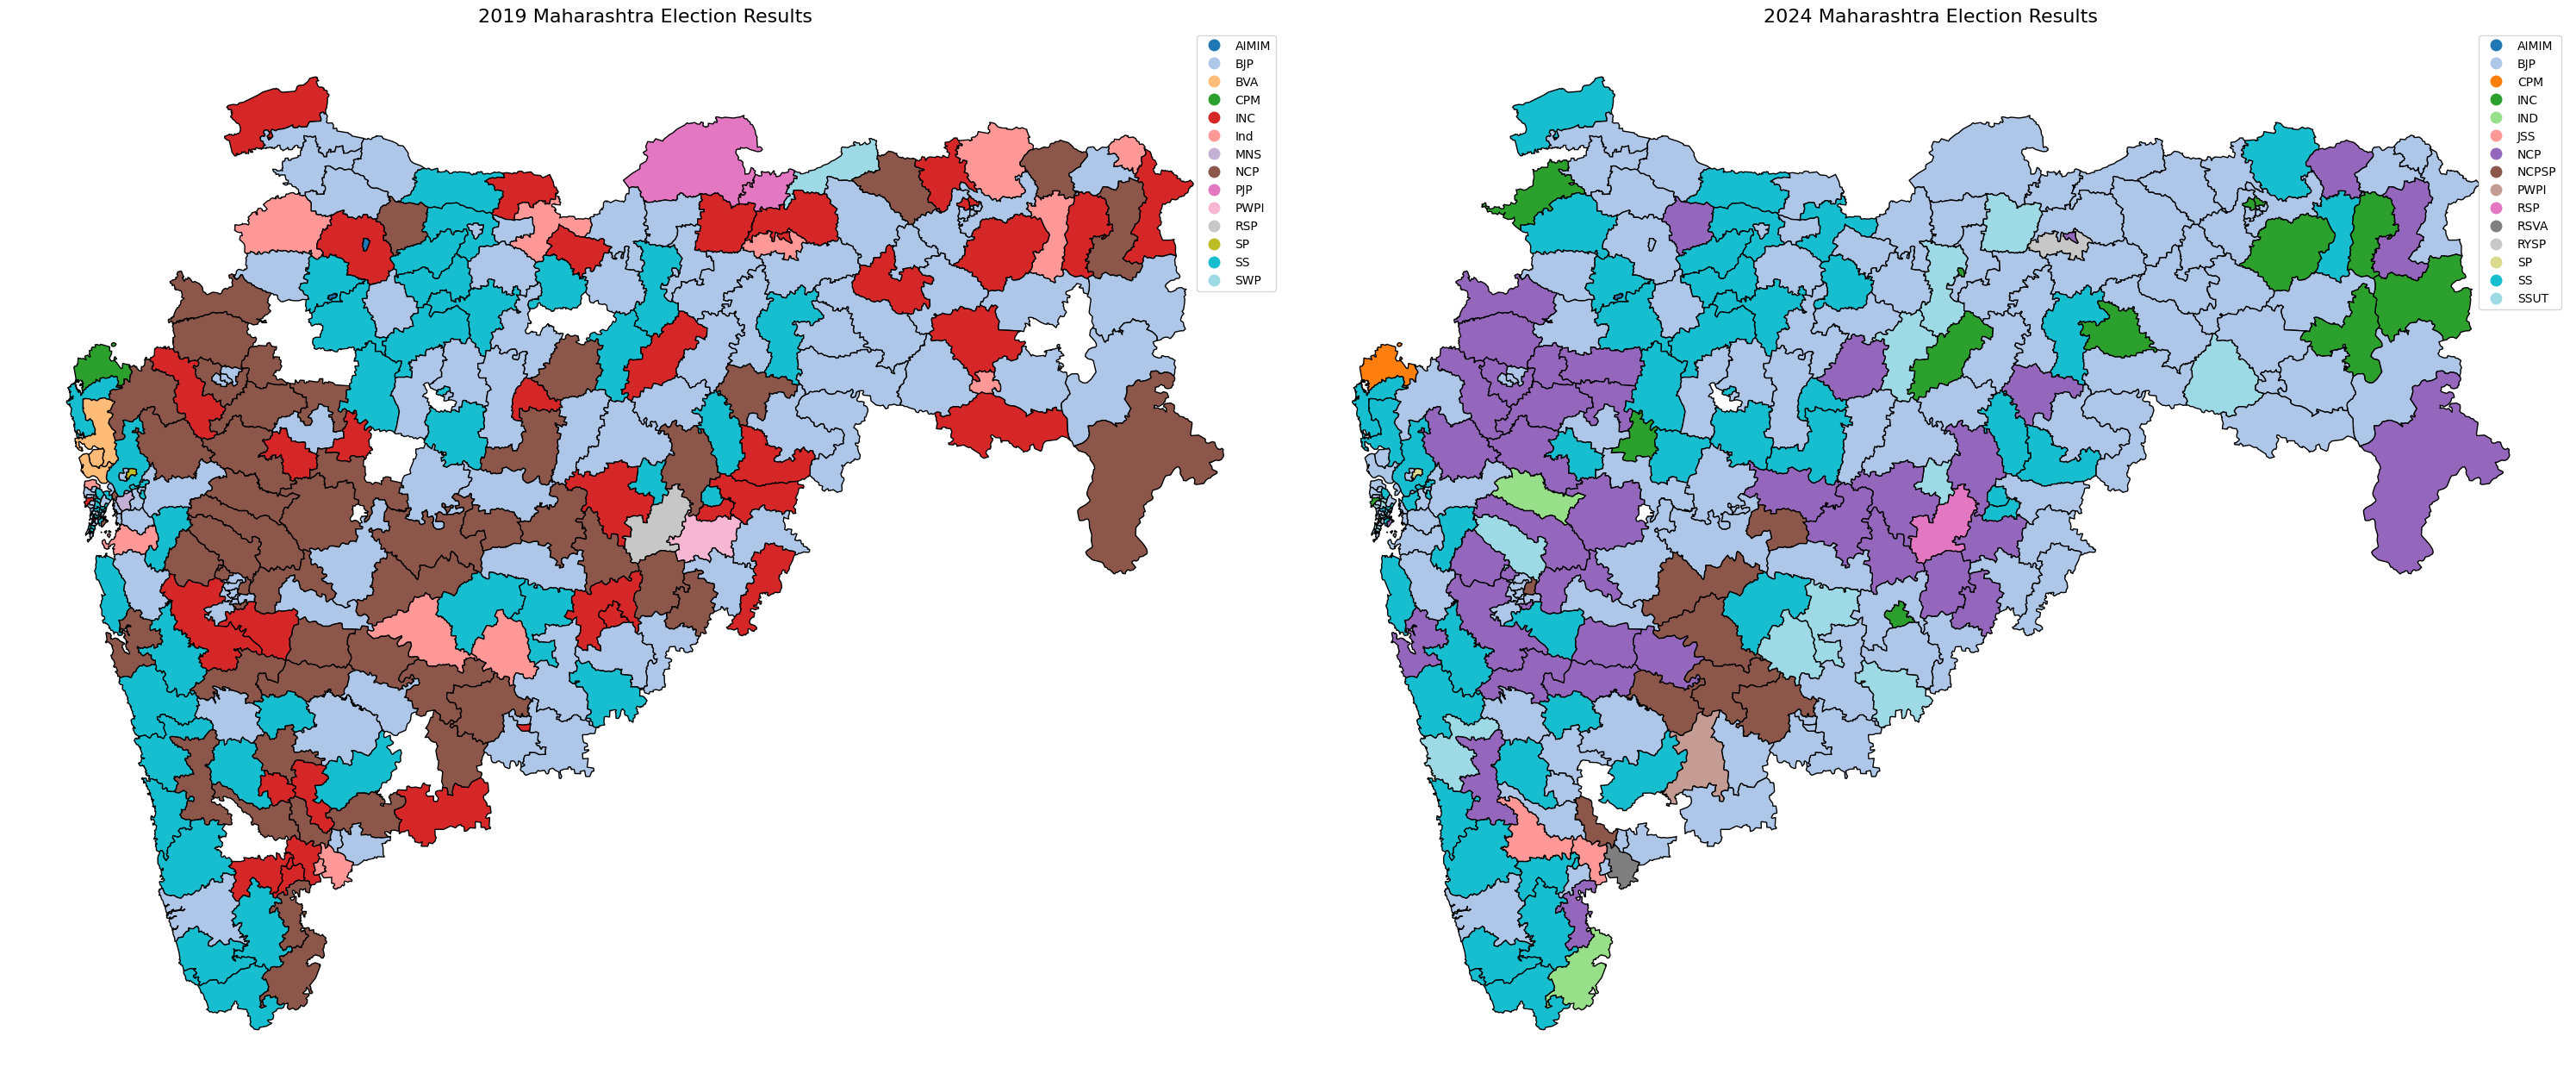

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(30, 20))

# 2019 Map
df2.plot(column='LeadingParty', cmap='tab20', legend=True, edgecolor='black', ax=axes[0])
axes[0].set_title('2019 Maharashtra Election Results', fontsize=16)
axes[0].axis('off')

# 2024 Map
df.plot(column='LeadingParty', cmap='tab20', legend=True, edgecolor='black', ax=axes[1])
axes[1].set_title('2024 Maharashtra Election Results', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [51]:
party_wins2019 = combined_data[combined_data['Year']==2019].groupby('LeadingParty').size()
party_wins2024 = combined_data[combined_data['Year']==2024].groupby('LeadingParty').size()

In [52]:
print(party_wins2019)

LeadingParty
AIMIM      2
BJP      105
BVA        3
CPM        1
INC       44
Ind       13
MNS        1
NCP       54
PJP        2
PWPI       1
RSP        1
SP         2
SS        56
SWP        1
dtype: int64


In [53]:
party_wins2019 = party_wins2019.reset_index(name='Seats')
party_wins2024 = party_wins2024.reset_index(name='Seats')

In [54]:
print(party_wins2024)

   LeadingParty  Seats
0         AIMIM      1
1           BJP    132
2           CPM      1
3           INC     16
4           IND      2
5           JSS      2
6           NCP     41
7         NCPSP     10
8          PWPI      1
9           RSP      1
10         RSVA      1
11         RYSP      1
12           SP      2
13           SS     57
14         SSUT     20


In [55]:
labels_2019 = party_wins2019['LeadingParty']
sizes_2019 = party_wins2019['Seats']

labels_2024 = party_wins2024['LeadingParty']
sizes_2024 = party_wins2024['Seats']


In [56]:
print(labels_2024)

print(sizes_2024)

0     AIMIM
1       BJP
2       CPM
3       INC
4       IND
5       JSS
6       NCP
7     NCPSP
8      PWPI
9       RSP
10     RSVA
11     RYSP
12       SP
13       SS
14     SSUT
Name: LeadingParty, dtype: object
0       1
1     132
2       1
3      16
4       2
5       2
6      41
7      10
8       1
9       1
10      1
11      1
12      2
13     57
14     20
Name: Seats, dtype: int64


In [57]:
print("2019 Sizes Length:", len(sizes_2019))
print("2019 Labels Length:", len(labels_2019))

print("2024 Sizes Length:", len(sizes_2024))
print("2024 Labels Length:", len(labels_2024))


2019 Sizes Length: 14
2019 Labels Length: 14
2024 Sizes Length: 15
2024 Labels Length: 15


In [58]:
print("2019 Labels:", labels_2019)
print("2019 Sizes:", sizes_2019)

print("2024 Labels:", labels_2024)
print("2024 Sizes:", sizes_2024)

# Check the mismatch
extra_label = set(labels_2024) - set(labels_2019)
print("Extra Label in 2024:", extra_label)

2019 Labels: 0     AIMIM
1       BJP
2       BVA
3       CPM
4       INC
5       Ind
6       MNS
7       NCP
8       PJP
9      PWPI
10      RSP
11       SP
12       SS
13      SWP
Name: LeadingParty, dtype: object
2019 Sizes: 0       2
1     105
2       3
3       1
4      44
5      13
6       1
7      54
8       2
9       1
10      1
11      2
12     56
13      1
Name: Seats, dtype: int64
2024 Labels: 0     AIMIM
1       BJP
2       CPM
3       INC
4       IND
5       JSS
6       NCP
7     NCPSP
8      PWPI
9       RSP
10     RSVA
11     RYSP
12       SP
13       SS
14     SSUT
Name: LeadingParty, dtype: object
2024 Sizes: 0       1
1     132
2       1
3      16
4       2
5       2
6      41
7      10
8       1
9       1
10      1
11      1
12      2
13     57
14     20
Name: Seats, dtype: int64
Extra Label in 2024: {'RYSP', 'RSVA', 'NCPSP', 'JSS', 'IND', 'SSUT'}


In [59]:
# Create a dictionary for matching labels and sizes
sizes_2024_dict = dict(zip(labels_2024, sizes_2024))

# Filter labels to include only those with corresponding sizes
filtered_labels_2024 = [label for label in labels_2024 if label in sizes_2024_dict]
filtered_sizes_2024 = [sizes_2024_dict[label] for label in filtered_labels_2024]

print("Filtered Labels 2024:", filtered_labels_2024)
print("Filtered Sizes 2024:", filtered_sizes_2024)


Filtered Labels 2024: ['AIMIM', 'BJP', 'CPM', 'INC', 'IND', 'JSS', 'NCP', 'NCPSP', 'PWPI', 'RSP', 'RSVA', 'RYSP', 'SP', 'SS', 'SSUT']
Filtered Sizes 2024: [1, 132, 1, 16, 2, 2, 41, 10, 1, 1, 1, 1, 2, 57, 20]


In [60]:
# Add missing sizes for extra labels
all_parties = set(labels_2024)  # Ensure all parties are included
sizes_2024_dict = dict(zip(labels_2024, sizes_2024))

# Fill missing parties with 0 seats
complete_sizes_2024 = [sizes_2024_dict.get(label, 0) for label in all_parties]
complete_labels_2024 = list(all_parties)

print("Complete Labels 2024:", complete_labels_2024)
print("Complete Sizes 2024:", complete_sizes_2024)


Complete Labels 2024: ['INC', 'RYSP', 'BJP', 'NCP', 'NCPSP', 'JSS', 'RSP', 'RSVA', 'SP', 'CPM', 'IND', 'PWPI', 'SS', 'SSUT', 'AIMIM']
Complete Sizes 2024: [16, 1, 132, 41, 10, 2, 1, 1, 2, 1, 2, 1, 57, 20, 1]


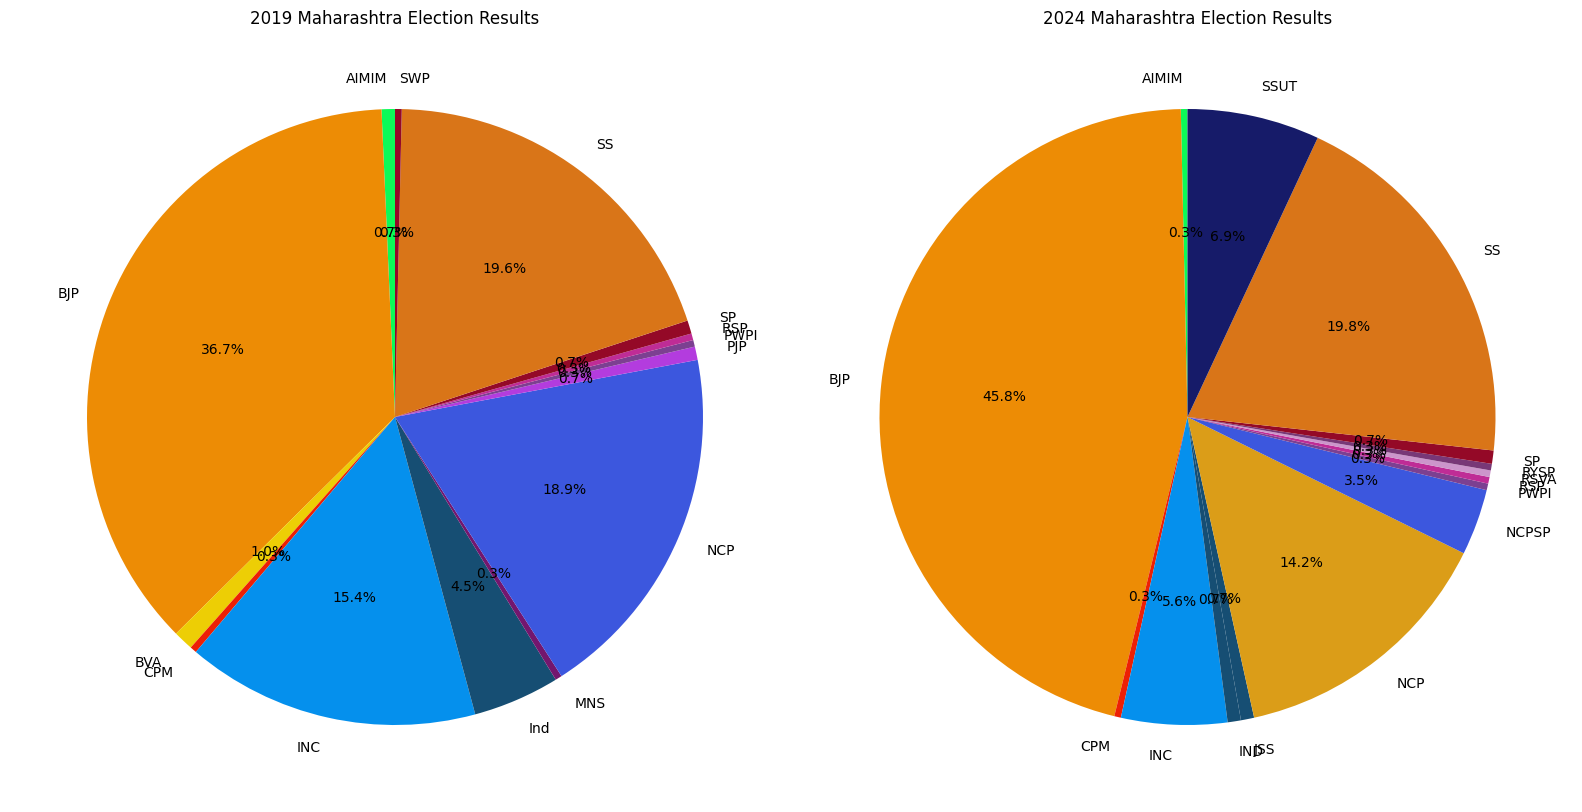

In [61]:
custom_colors = ['#0cfa58', '#ed8c05', '#edce05', '#ed2005', '#0590ed', '#164e73', '#73166e', '#3c57de', '#b33cde', '#7c4091', '#bf2c96', '#940927', '#d97518', '#940927'] 
custom_colors1 = ['#0cfa58', '#ed8c05', '#ed2005', '#0590ed', '#164e73', '#164e73', '#db9d18', '#3c57de', '#7c4091', '#bf2c96', '#cc95cb', '#783877', '#940927', '#d97518', '#161b69']

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for 2019
axes[0].pie(sizes_2019, labels=labels_2019, autopct='%1.1f%%', startangle=90, colors=custom_colors)
axes[0].set_title('2019 Maharashtra Election Results')

axes[1].pie(sizes_2024, labels=labels_2024, autopct='%1.1f%%', startangle=90, colors=custom_colors1)
axes[1].set_title('2024 Maharashtra Election Results')

plt.tight_layout()
plt.show()

In [62]:
# Create a color mapping for each party
color_mapping = {
    'INC': 'blue',
    'NCPSP': 'blue',
    'SSUT': 'blue',
    'BJP': 'orange',
    'SS': 'orange',
    'NCP':'orange',
    'AIMIM':'green',
    'SP':  'red',
    
    # Add more parties and their corresponding colors
}


In [63]:
color_1mapping = {
    'INC': 'blue',
    'NCP': 'blue',
    'BJP': 'orange',
    'SS': 'orange',
    'AIMIM':'green',
    'SP':  'red',
    
    # Add more parties and their corresponding colors
}


C:\Users\arvin\AppData\Local\Temp\ipykernel_31284\2381790453.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(df2.geometry.centroid.x, df2.geometry.centroid.y, df2['LeadingParty']):
C:\Users\arvin\AppData\Local\Temp\ipykernel_31284\2381790453.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(df.geometry.centroid.x, df.geometry.centroid.y, df['LeadingParty']):


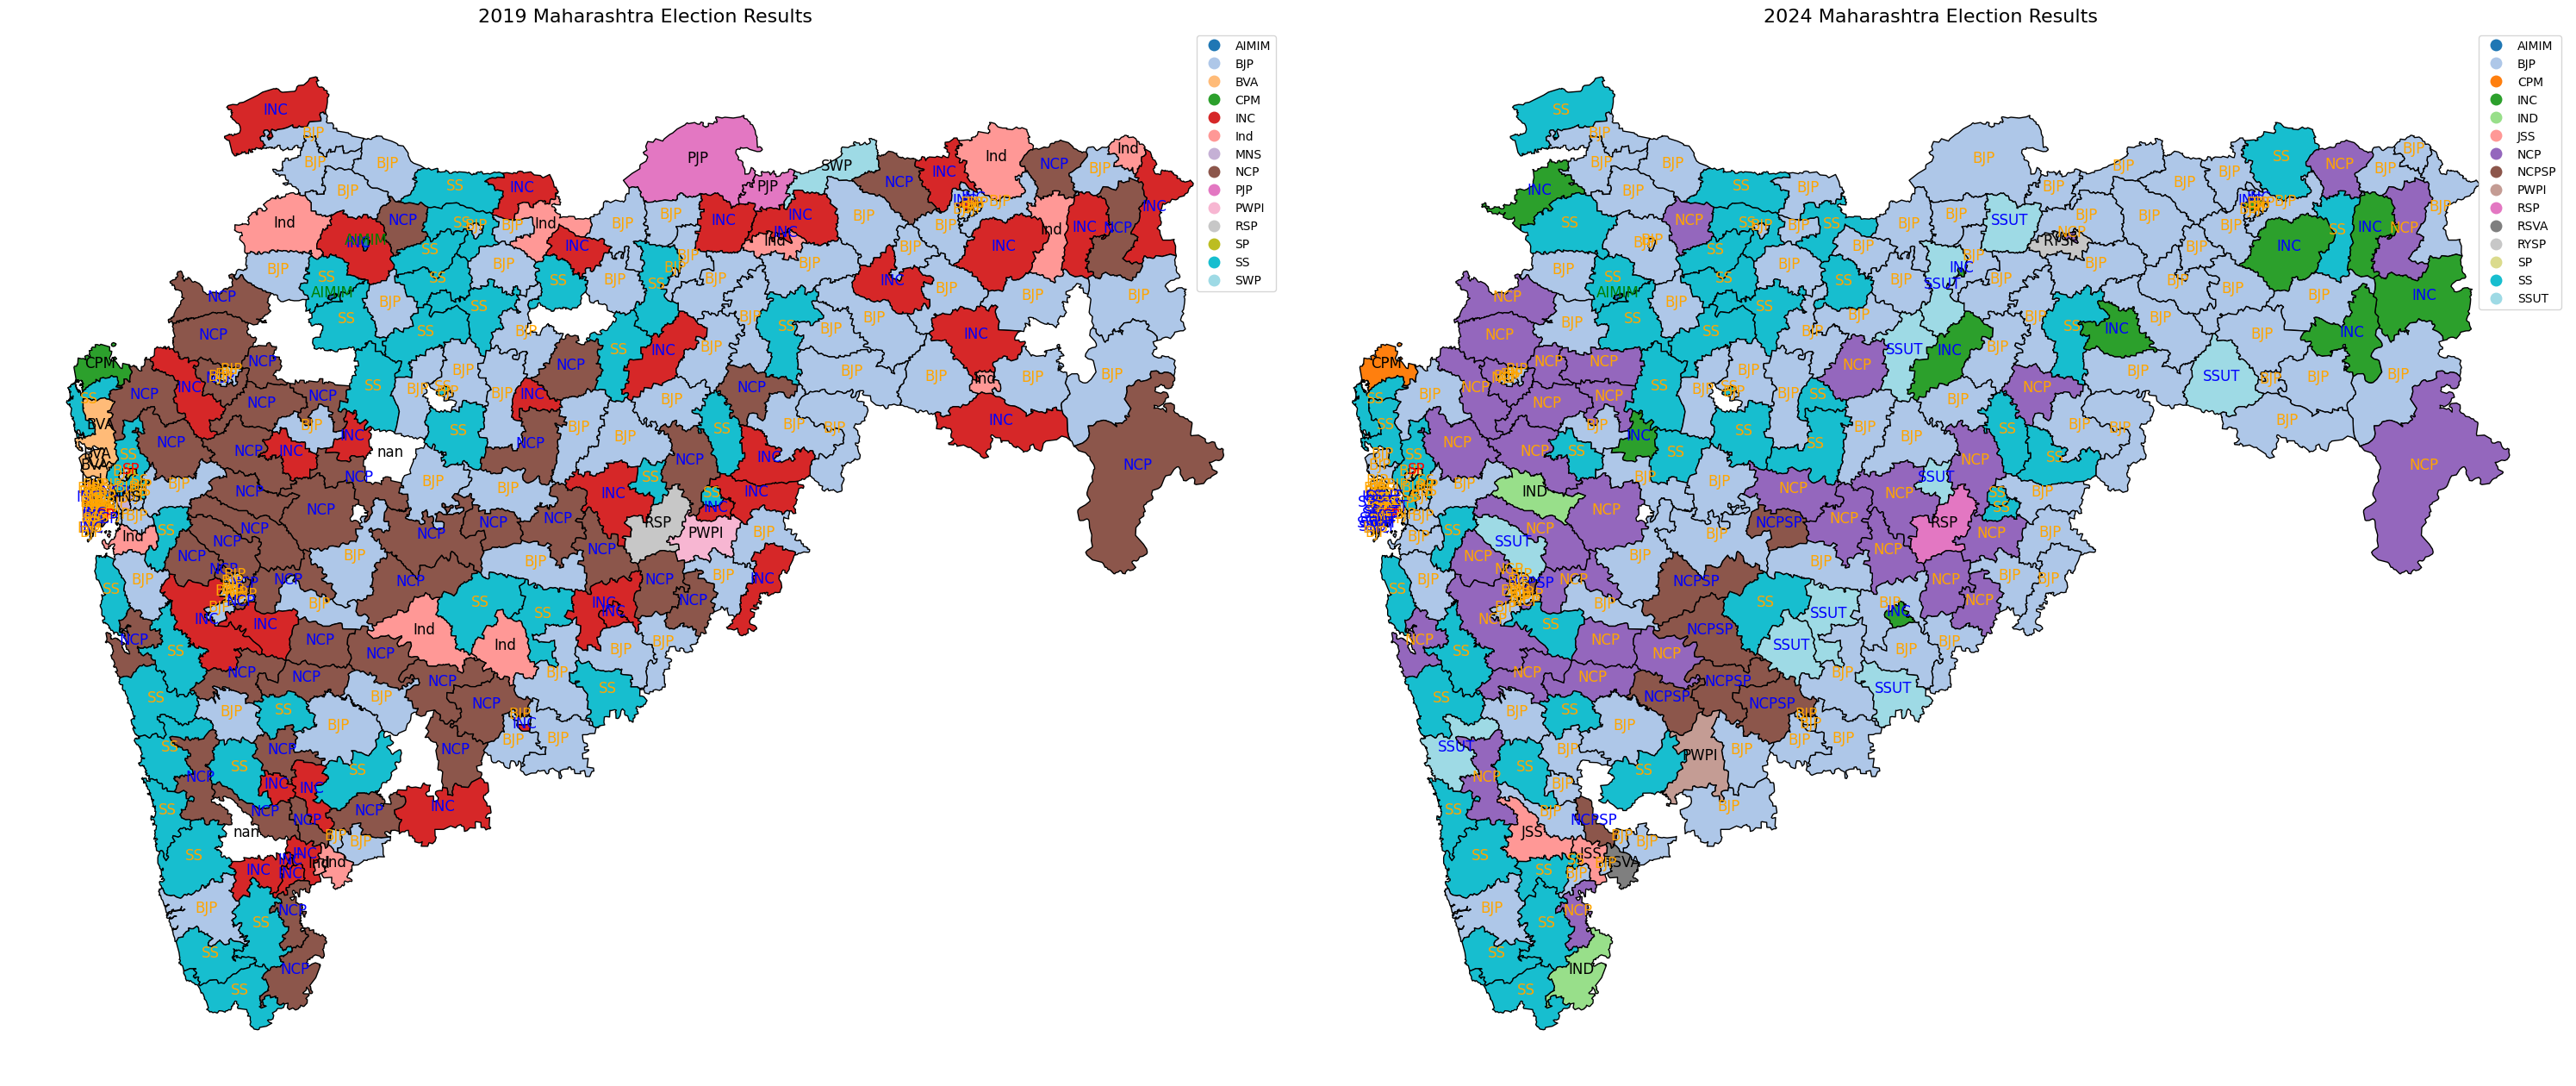

In [64]:

# Assuming df2 and df are your GeoDataFrames for 2019 and 2024 respectively


fig, axes = plt.subplots(1, 2, figsize=(30, 20))

# 2019 Map
df2.plot(column='LeadingParty', cmap='tab20', legend=True, edgecolor='black', ax=axes[0])
axes[0].set_title('2019 Maharashtra Election Results', fontsize=16)
axes[0].axis('off')

# Add labels with custom colors
for x, y, label in zip(df2.geometry.centroid.x, df2.geometry.centroid.y, df2['LeadingParty']):
    axes[0].text(x, y, label, fontsize=12, ha='center', color=color_1mapping.get(label, 'black'))

# 2024 Map
df.plot(column='LeadingParty', cmap='tab20', legend=True, edgecolor='black', ax=axes[1])
axes[1].set_title('2024 Maharashtra Election Results', fontsize=16)
axes[1].axis('off')

# Add labels with custom colors
for x, y, label in zip(df.geometry.centroid.x, df.geometry.centroid.y, df['LeadingParty']):
    axes[1].text(x, y, label, fontsize=12, ha='center', color=color_mapping.get(label, 'black'))

plt.tight_layout()
plt.show()


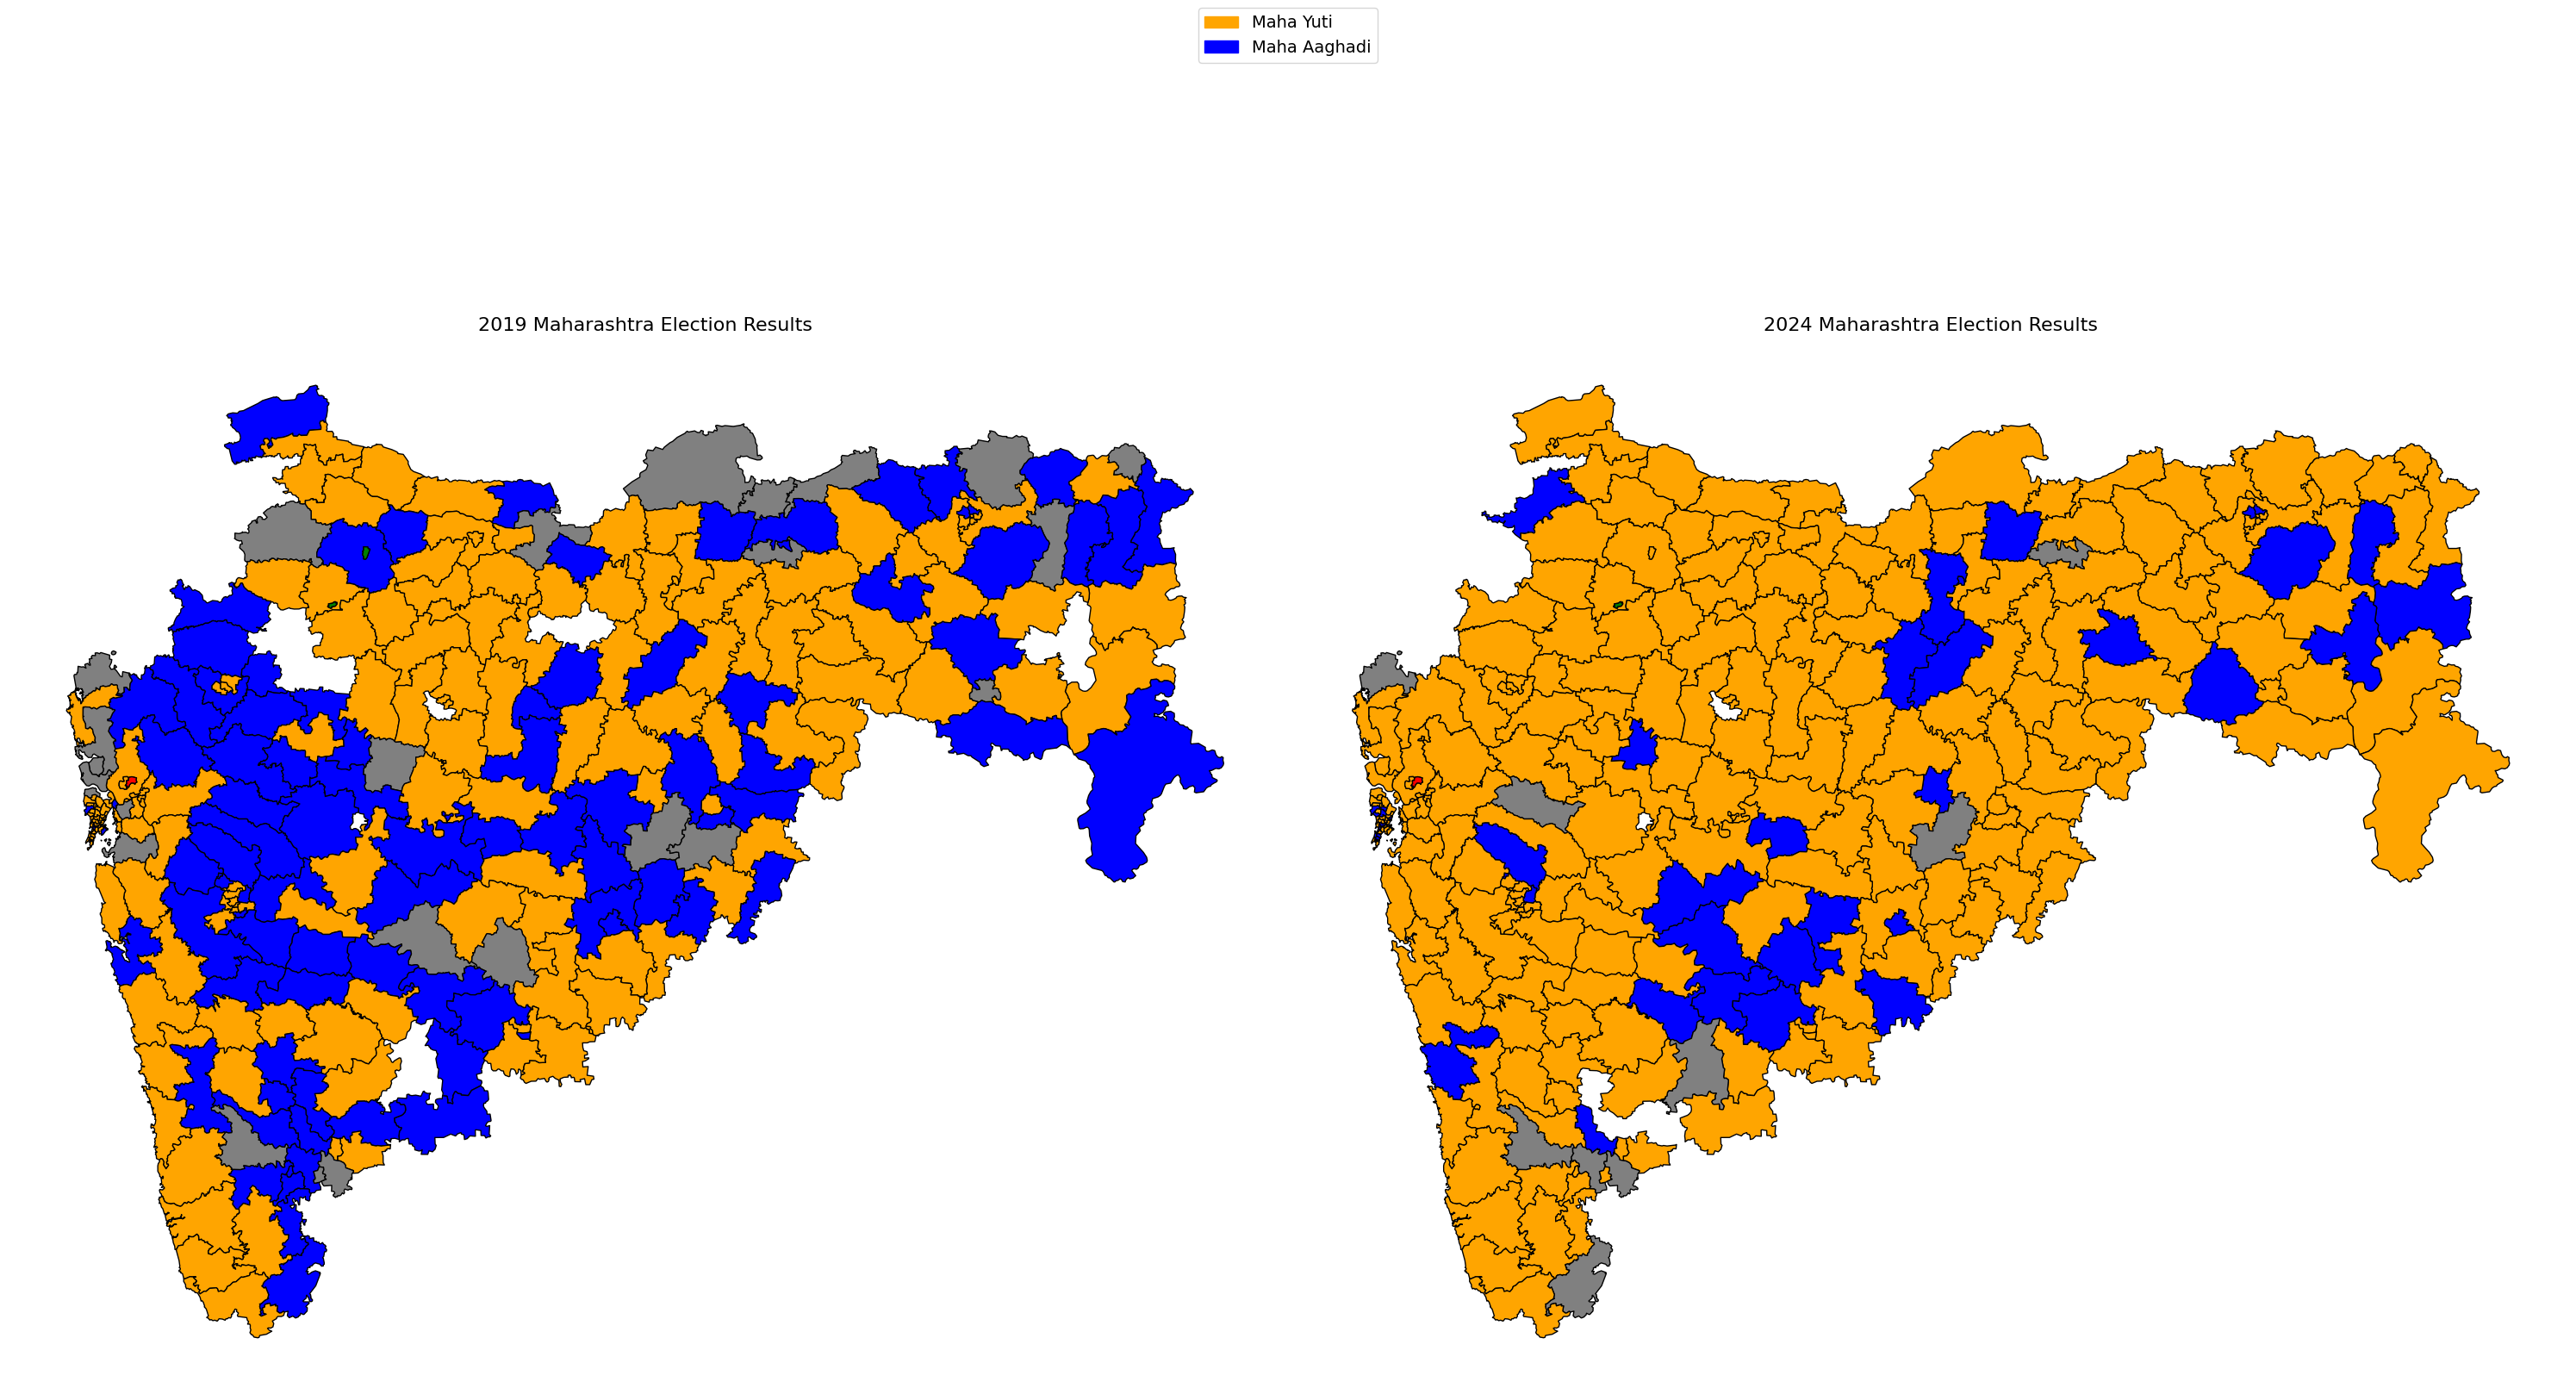

In [65]:
import matplotlib.patches as mpatches
# Create a new column in the DataFrame for colors
df2['Color'] = df2['LeadingParty'].map(color_1mapping)
df['Color'] = df['LeadingParty'].map(color_mapping)

# Set a default color for NaN values
default_color = 'gray' # You can choose any color you prefer
df2['Color'].fillna(default_color, inplace=True)
df['Color'].fillna(default_color, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(30, 20))

# 2019 Map
df2.plot(color=df2['Color'], edgecolor='black', ax=axes[0])
axes[0].set_title('2019 Maharashtra Election Results', fontsize=16)
axes[0].axis('off')

# 2024 Map
df.plot(color=df['Color'], edgecolor='black', ax=axes[1])
axes[1].set_title('2024 Maharashtra Election Results', fontsize=16)
axes[1].axis('off')

label1 = mpatches.Patch(color='orange', label='Maha Yuti')  
label2 = mpatches.Patch(color='blue', label='Maha Aaghadi')   

# Add the custom labels to the plot
fig.legend(handles=[label1, label2], loc='upper center', fontsize=14) 

plt.tight_layout()
plt.show()